In [1]:
import numpy as np
import matplotlib.pyplot as pl
from skimage import filters, feature
from IPython.display import display
from skimage.color import rgb2gray
from skimage.transform import hough_line, probabilistic_hough_line

In [5]:
pl.rcParams['text.color'] = 'black'
pl.rcParams['xtick.color'] = 'black'
pl.rcParams['ytick.color'] = 'black'
pl.rcParams['axes.labelcolor'] = 'black'
font = {'family' : 'normal', 'weight' : 'normal', 'size'   : 18}
pl.rc('font', **font)

'Theta ma: 158 hodnoty.'

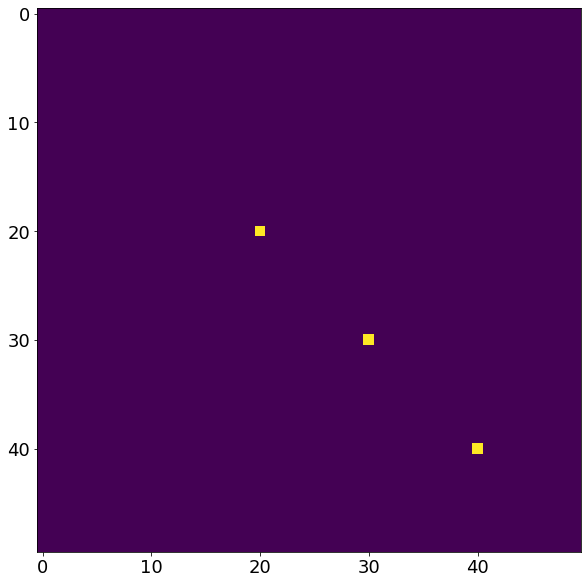

In [9]:
zero = np.zeros((50, 50), dtype= np.bool)
zero[20, 20] = 1
zero[30, 30] = 1
zero[40, 40] = 1

pl.figure(figsize= (15, 10))
pl.imshow(zero)
theta = np.arange(0, np.pi, 0.02)
display("Theta ma: "+ str(theta.size) + " hodnoty.")

rho = x * cos(theta) + y * sin(theta)

Rho predstavuje vzdialenosť od počiatku ku priamke.

Theta predstavuje uhol medzi počiatkom a priamkou.

Text(0, 0.5, 'Rhos - premapovane do disk. priestoru 121')

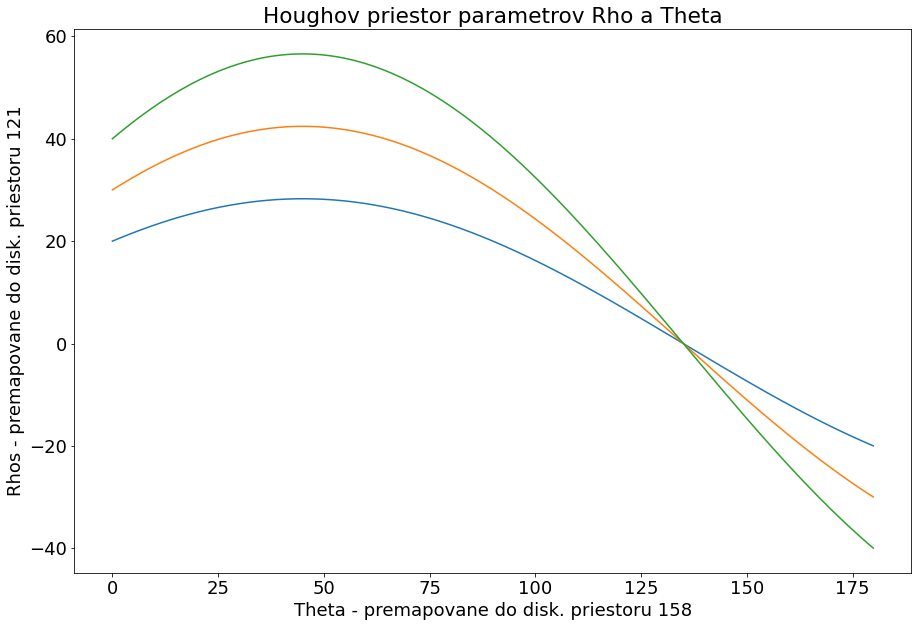

In [14]:
x, y = np.where(zero == 1)
pl.figure(figsize= (15, 10))
rhoStack = []
for i in range(0,x.size):
    rhos = x[i] * np.cos(theta) + y[i] * np.sin(theta)
    rhoStack.append(rhos)
    pl.plot(np.rad2deg(theta), rhos)

pl.title("Houghov priestor parametrov Rho a Theta")
pl.xlabel("Theta - premapovane do disk. priestoru 158")
pl.ylabel("Rhos - premapovane do disk. priestoru 121")

Na obrázku vidíme znázornený Houghov priestor. Každá krivka znázornuje vzdialenosť a uhol od počiatku ku bodu. Tri krivky predstavujú nami vytvorené tri body v binárnom priestore. Krivky sa prelínajú v bode Rho [-0.10763581] a Theta [135.21803965]. To znamená, že sme našli vhodnú priamku, ktorá prechádza všetkými bodmi a nachádza sa -0,107 pixelu od počiatku pod uhlom 135 stupňov od počiatku. Zároveň je potrebné pripomenúť, že čím viac priesečníkov dostaneme, tým viac hlasovacích bodov dany bod dostane.

In [15]:
rhoStack = np.array(rhoStack)

r1 = np.abs(rhoStack[0, :] - rhoStack[1, :])
r2 = np.abs(rhoStack[0, :] - rhoStack[2, :])
r3 = np.abs(rhoStack[1, :] - rhoStack[2, :])

minDif = np.where((r1 + r2 + r3) == np.min(r1 + r2 + r3) )
rhoWinner = rhoStack[0, minDif]
thetaWinner = theta[minDif]
display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format(rhoWinner, np.rad2deg(thetaWinner)))

'We found fitting  line with params Rho: [[-0.10763581]] pixels and Theta [135.21803965] degrees'

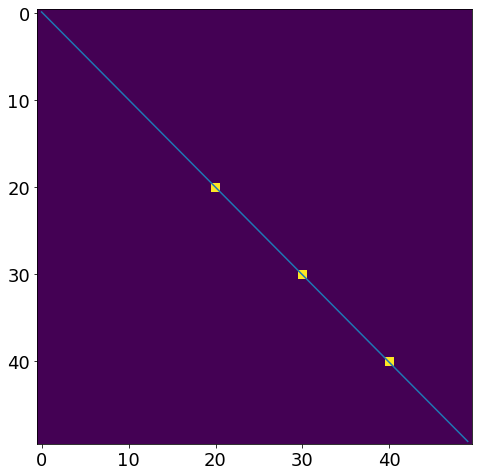

In [16]:
lineX = np.array([[0, zero.shape[1] - 1]])

lineY = (-np.cos(thetaWinner) / np.sin(thetaWinner)) * lineX + rhoWinner / np.sin(thetaWinner)
pl.figure(figsize= (8, 8))
pl.imshow(zero)
pl.plot(lineX.ravel(), lineY.ravel())

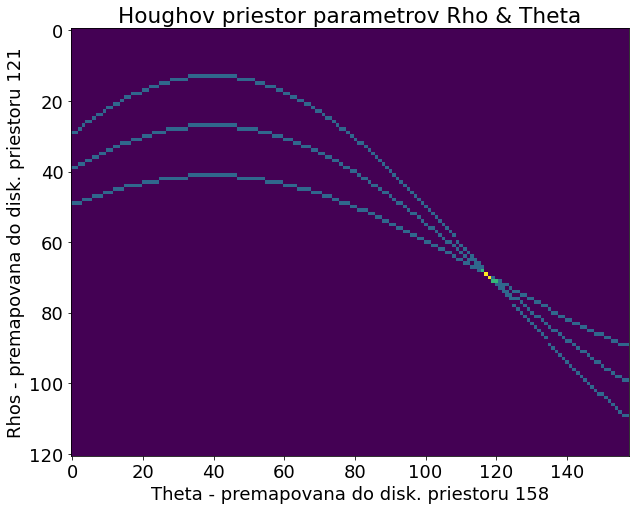

In [17]:
accumulator = []
for i in range(0, x.size):
    rhos = x[i] * np.cos(theta) + y[i] * np.sin(theta)
    accumulator.append(rhos)
accumulator = np.array(rhoStack)

D = np.sqrt(zero.shape[0] ** 2 + zero.shape[1] ** 2)
rhoRange = np.arange(-zero.shape[1], D, 1)

houghSpace = np.zeros((rhoRange.size, theta.size))

for i in range(0, theta.size):
    rhoVals = accumulator[:, i]
    yHist, xHist = np.histogram(rhoVals, rhoRange)
    houghSpace[:houghSpace.shape[0] - 1, i] = np.flipud(yHist)

pl.figure(figsize= (10, 10))
pl.title('Houghov priestor parametrov Rho & Theta')
pl.xlabel('Theta - premapovana do disk. priestoru 158')
pl.ylabel('Rhos - premapovana do disk. priestoru 121')
pl.imshow(houghSpace)

In [18]:
max_hough = np.max(houghSpace)
x, y = np.where(houghSpace == max_hough)
theta_winner= theta[y[1]]
rho_winner = rhoRange[rhoRange.size - x[1]]
display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format([rhoWinner],np.rad2deg(thetaWinner)))

'We found fitting  line with params Rho: [array([[-0.10763581]])] pixels and Theta [135.21803965] degrees'

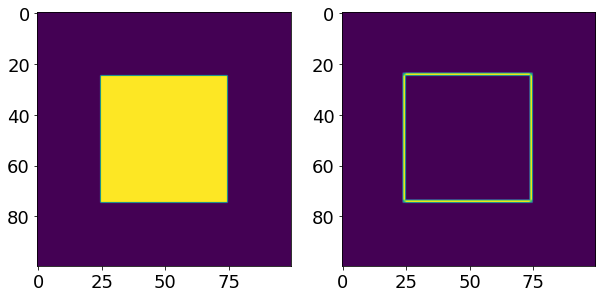

In [19]:
pl.figure(figsize= (10, 10))
zeros = np.zeros((100, 100))
zeros[25:75, 25:75] = 255
pl.subplot(121)
pl.imshow(zeros)

pl.subplot(122)
zeros = filters.roberts(zeros)
pl.imshow(zeros)

Text(0, 0.5, 'Rhos')

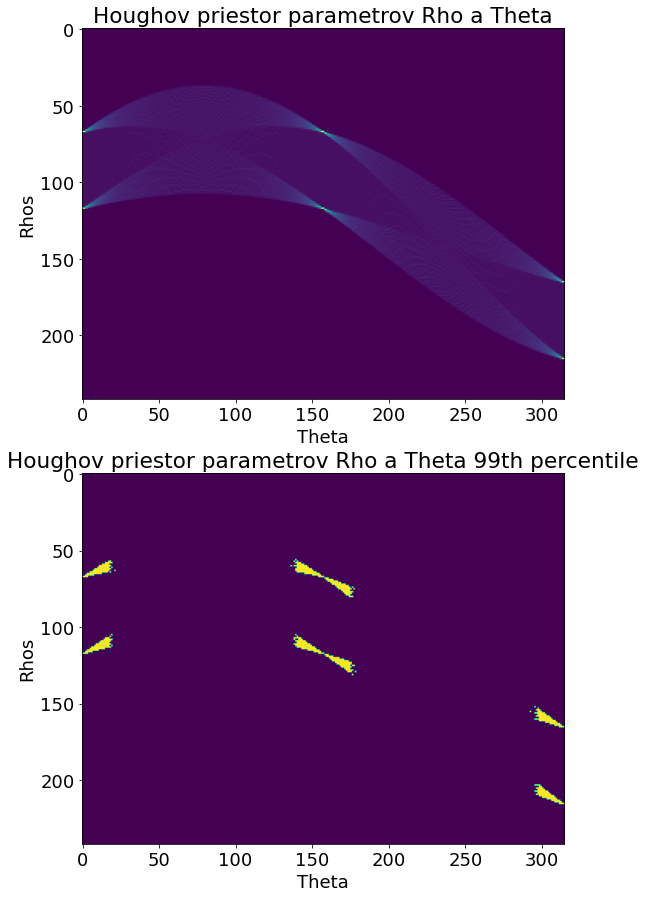

In [20]:
width, height = zeros.shape
D = (height**2 + width**2) **(1/2)
thetas = np.arange(0, np.pi, 0.01)
rhos = np.arange(-width, D, 1)
houghSpace = np.zeros((rhos.size, thetas.size))

x, y = np.where(zeros > 0)

accumulator = np.zeros((x.size, thetas.size))

cosVals = np.matmul(np.expand_dims(np.arange(0, width, 1), axis=0).T,
                    np.expand_dims(np.cos(thetas), axis= 0))
sinVals = np.matmul(np.expand_dims(np.arange(0, height, 1), axis=0).T,
                    np.expand_dims(np.sin(thetas), axis = 0))

xMatch = cosVals[x, :]
yMatch = sinVals[y, :]
accumulator[:, :] =  xMatch + yMatch

for i in range(0, thetas.size):
    rhoVals = accumulator[:, i]
    yHist, xHist = np.histogram(rhoVals, rhos)
    houghSpace[1:, i] = np.flipud(yHist)

pl.figure(figsize=(25,15))
pl.subplot(211)
pl.imshow(houghSpace)
pl.title('Houghov priestor parametrov Rho a Theta')
pl.xlabel('Theta')
pl.ylabel('Rhos')

pl.subplot(212)
pl.imshow(houghSpace > np.percentile(houghSpace, 99))
pl.title('Houghov priestor parametrov Rho a Theta 99th percentile')
pl.xlabel('Theta')
pl.ylabel('Rhos')

In [21]:
circuit = rgb2gray(pl.imread('imgs/circuit.jpg'))
pl.figure(figsize= (10, 10))
pl.subplot(121)
pl.title('Original')
pl.imshow(circuit, cmap= 'gray')

pl.subplot(122)
pl.title('Edges')
edge = feature.canny(circuit, sigma = 1.4)
pl.imshow(edge, cmap= 'gray')

pl.figure(figsize=(20,10))
pl.title('Hough space')
a, b, c = hough_line(edge)
pl.pcolor(b, c, a)

pl.figure(figsize=(10,10))
pl.subplot(121)
pl.title('Original + marked edges')
line = probabilistic_hough_line(edge, threshold= 60, line_length= 10, line_gap= 1)
pl.imshow(circuit, cmap= 'gray')
for l in line:
    p0, p1 = l
    pl.plot((p0[0], p1[0]), (p0[1], p1[1]), 'r-')

pl.subplot(122)
pl.title('Edges + marked edges')
line = probabilistic_hough_line(edge, threshold= 50, line_length= 10, line_gap= 1)
pl.imshow(edge, cmap= 'gray')
for l in line:
    p0, p1 = l
    pl.plot((p0[0], p1[0]), (p0[1], p1[1]), 'r-')

FileNotFoundError: [Errno 2] No such file or directory: 'imgs/circuit.jpg'